PROJECT DEEP LEARNING - CNN BY MAUZUM SHAMIL

# importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D,BatchNormalization
from PIL import Image
from keras.utils import to_categorical,plot_model

import os 
from sklearn.preprocessing import OneHotEncoder



# encoding 

In [3]:
encoder = OneHotEncoder()
encoder.fit([[1],[0]])

# [1] = apple
# [0] = mango


OneHotEncoder()

In [4]:
# apple

data =[]
paths=[]
result =[]

for r,d,f in os.walk(r"C:\Users\dell\Desktop\Fruits\train\Apple_train"):
    for file in f:
        if '.jpg' in file or '.jpeg' in file:
            paths.append(os.path.join(r,file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)

    if(img.shape==(128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [5]:
# mango
paths = []

for r,d,f in os.walk(r"C:\Users\dell\Desktop\Fruits\train\Mango_train"):
    for file in f:
        if '.jpg' in file or '.jpeg' in file:
            paths.append(os.path.join(r,file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)

    if(img.shape==(128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

 # changing to array

In [6]:
data = np.array(data)
data.shape

(882, 128, 128, 3)

In [9]:
result =np.array(result)
result.shape
result = result.reshape(882,2)
result.shape

(882, 2)

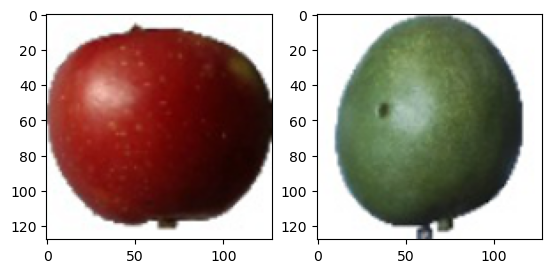

In [12]:
plt.subplot(1,2,1)
plt.imshow(data[200])
plt.subplot(1,2,2)
plt.imshow(data[666])

# splitting and training

In [15]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test = train_test_split(data,result,test_size=0.2,shuffle=True,random_state=0)

# model creation with CNN using sequential

In [23]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2,2), input_shape=(128,128,3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2,2),activation='relu', padding = 'Same'))
model.add(Dropout(0.45))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(2,2),activation='relu',padding='Same' ))
model.add(Conv2D(64,kernel_size=(2,2),activation='relu',padding='Same' ))
model.add(Dropout(0.45))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.45))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='sigmoid'))


print(model.summary())

c:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    33,554,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,585,602 (128.12 MB)

 Trainable params: 33,585,410 (128.12 MB)

 Non-trainable params: 192 (768.00 B)

None


# compile and fitting

In [25]:
model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
x_train.shape

(705, 128, 128, 3)

In [27]:
y_train.shape

(705, 2)

In [28]:
history = model.fit(x_train,y_train,epochs=10,batch_size=64,verbose=1)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.8268 - loss: 0.6908
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.9998 - loss: 2.2540  
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 1.0000 - loss: 3.8290e-32
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 10/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00


In [30]:
score = model.evaluate(x_test,y_test,batch_size=64)
print("test accuracy : %0.2f%%" % (100.0 * score[1]))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 1.0000 - loss: 0.0000e+00
test accuracy : 100.00%


In [31]:
def names(number):
    if number==0:
        return 'it is a mango'
    else:
        return 'it is a apple'

100.0% Confidence this is it is a mango


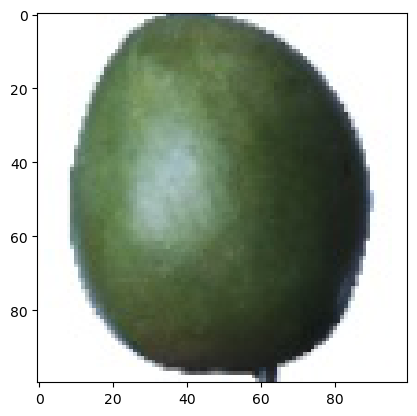

In [33]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\dell\Desktop\Fruits\train\Mango_train\Mango_8.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence this is ' + names(classification))

100.0% Confidence this is it is a apple


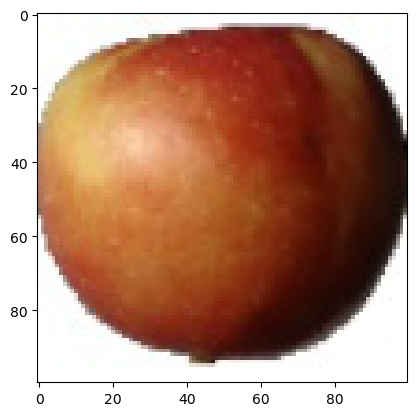

In [35]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\dell\Desktop\Fruits\train\Apple_train\Apple Braeburn_3.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence this is ' + names(classification))